In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Import Data from /r/politics The post title and the number of upvotes
data = pd.read_csv('data.csv',escapechar="\\")
data_sub = data[['title', 'ups']]
data_sub.is_copy = False
data_sub['log_ups'] = np.log1p(data_sub['ups'])

Data Description:
------------------

In [2]:
# Stats for Upvotes
data_sub.describe()

,ups,log_ups
count,35018.000000,35018.000000
mean,589.979239,3.775398
std,2723.521822,2.264599
min,0.000000,0.000000
25%,11.000000,2.484907
50%,38.000000,3.663562
75%,166.000000,5.117994
max,52230.000000,10.863431


In [3]:
# Stats for Titles
num_of_titles = len(data_sub['title'])
max_len_title = max([len(x) for x in data_sub['title']])
avg_len_title = int(np.mean([len(x) for x in data_sub['title']]))
max_word_count = max([len(x.split()) for x in data_sub['title']])
avg_word_count = int(np.mean([len(x.split()) for x in data_sub['title']]))

print('Number of Titles: \t{0}'.format(num_of_titles))
print('Max Length of Title: \t{0} characters'.format(max_len_title))
print('Avg Length of Title: \t{0} characters'.format(avg_len_title))
print('Max words in Title: \t{0} words'.format(max_word_count))
print('Avg words in Title: \t{0} words'.format(avg_word_count))


Number of Titles: 	35018
Max Length of Title: 	299 characters
Avg Length of Title: 	67 characters
Max words in Title: 	53 words
Avg words in Title: 	10 words


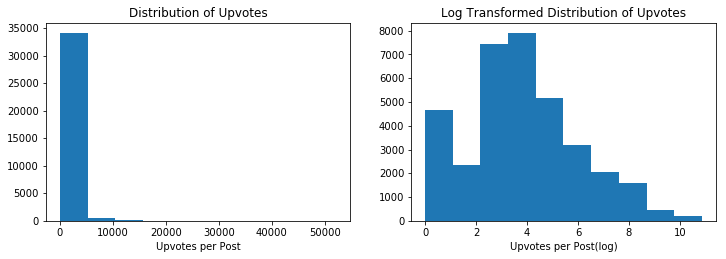

In [4]:
# Distribution of Upvotes
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title('Distribution of Upvotes')
plt.hist(data_sub['ups'])
plt.xlabel('Upvotes per Post')

plt.subplot(2,2,2)
plt.title('Log Transformed Distribution of Upvotes')
plt.hist(data_sub['log_ups'])
plt.xlabel('Upvotes per Post(log)')
plt.show()

Apply Model Flow
========

In [5]:
# split Data in to test and training sets
train_titles, test_titles, train_labels, test_labels = train_test_split(data_sub.title, 
                                                                        data_sub.ups, 
                                                                        test_size=0.20,
                                                                        random_state=42)
# Tokenize with specified ngram then apply tf-idf
tfidf = TfidfVectorizer(ngram_range=(1,3)).fit(train_titles, train_labels)
train_titles_tfidf = tfidf.transform(train_titles)
test_titles_tfidf = tfidf.transform(test_titles)

# Apply Linear Regression & Prediction
reg = Ridge()
reg.fit(train_titles_tfidf, train_labels)
test_predictions = reg.predict(test_titles_tfidf)

MAE:  627.313849349
Mean Train 601.92946384
Mean Test 542.181753284


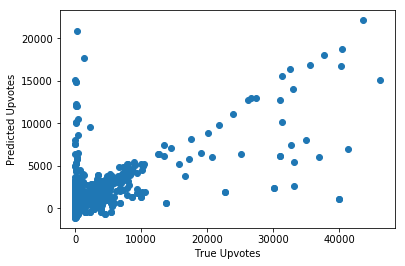

In [6]:
print('MAE: ', mean_absolute_error(test_predictions, test_labels))
print('Mean Train', np.mean(train_labels))
print('Mean Test', np.mean(test_labels))

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Upvotes')
plt.ylabel('Predicted Upvotes')
plt.show()